<a href="https://colab.research.google.com/github/ntkl06/khanhlinh06.github.io/blob/main/buoi06_250923_04_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tutorial 7a: Feature Construction**                                           

transformers
These tasks are done using transformers

sklearn's "transformer" is used for this, the main methods being:

transformer.fit()
transformer.transform()
transformer.fit_transform()
Note that the analysis and fitting(training) is based only on the train dataset. After that, the learned transformations are applied to the test data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Load the dataset**

In [3]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Seperate the target variable
X=df[df.columns[1:-1]]   # read "-1" as "the last one"
y=df[df.columns[-1]]

In [5]:
X, y

(     sepal_width  petal_length  petal_width
 0            3.5           1.4          0.2
 1            3.0           1.4          0.2
 2            3.2           1.3          0.2
 3            3.1           1.5          0.2
 4            3.6           1.4          0.2
 ..           ...           ...          ...
 145          3.0           5.2          2.3
 146          2.5           5.0          1.9
 147          3.0           5.2          2.0
 148          3.4           5.4          2.3
 149          3.0           5.1          1.8
 
 [150 rows x 3 columns],
 0         setosa
 1         setosa
 2         setosa
 3         setosa
 4         setosa
          ...    
 145    virginica
 146    virginica
 147    virginica
 148    virginica
 149    virginica
 Name: species, Length: 150, dtype: object)

In [6]:
# Show the number of instances per class
y.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [7]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
#Check before standardization
X_train.head()

,sepal_width,petal_length,petal_width
98,2.5,3.0,1.1
68,2.2,4.5,1.5
19,3.8,1.5,0.3
143,3.2,5.9,2.3
99,2.8,4.1,1.3


**PCA**


In [9]:
#Now lets apply 1-1 "StandardScaler" transformer
#1) import the module
from sklearn.preprocessing import StandardScaler

#2) define the model
scaler=StandardScaler()

#3) fit the model
scaler.fit(X_train)

#4) transform the data
X_train_ss = scaler.transform(X_train)

# note 3 and 4 could be combined like this:
# X_train_ss = SS.fit_transform(X_train)

In [10]:
X_train_ss

array([[-1.22024754, -0.4419858 , -0.13661044],
       [-1.87955796,  0.40282929,  0.38029394],
       [ 1.63676428, -1.2868009 , -1.17041921],
       [ 0.31814344,  1.19132338,  1.41410271],
       [-0.56093712,  0.17754527,  0.12184175],
       [-0.12139684,  0.79707634,  1.41410271],
       [ 0.0983733 , -1.2868009 , -1.4288714 ],
       [ 1.63676428, -1.23047989, -1.29964531],
       [-0.34116698, -1.3431219 , -1.29964531],
       [-0.12139684,  1.19132338,  1.15565051],
       [ 0.31814344,  0.74075533,  1.02642442],
       [-0.12139684, -1.3431219 , -1.29964531],
       [-0.12139684, -1.23047989, -1.29964531],
       [-0.34116698,  0.40282929,  0.38029394],
       [-1.44001768,  0.00858225, -0.13661044],
       [ 0.31814344,  1.24764439,  0.76797223],
       [ 0.75768372, -1.23047989, -1.04119311],
       [ 0.31814344, -1.23047989, -1.29964531],
       [ 0.53791358,  1.07868137,  1.6725549 ],
       [ 0.31814344,  0.57179231,  0.76797223],
       [ 0.75768372, -1.2868009 , -1.041

**Run PCA**

In [11]:
#Now lets perfrom pca
#Steps are similar to the scale transformer
#1) import the module
from sklearn.decomposition import PCA
#2) define the model
pca = PCA(n_components=2)   # n_components means the pca transformation constructs this many features
#3) fit the model
pca.fit(X_train_ss)
#4) transform the data
pca_train = pca.transform(X_train_ss)
# 3 and 4 could be combined
# pca_train = pca.fit_transform(X_train_ss)
# print the output, which is a matrix of only two features
pca_train[:10,:]
# ALT: plt.scatter(pca_train[:,0],pca_train[:,1])

array([[ 0.09953905, -1.27195338],
       [ 1.24517682, -1.511778  ],
       [-2.23995982,  0.82850939],
       [ 1.56980436,  1.02026044],
       [ 0.41457825, -0.43457392],
       [ 1.48337778,  0.51976305],
       [-1.80491446, -0.66531921],
       [-2.2865126 ,  0.80241998],
       [-1.58636569, -1.04325442],
       [ 1.57485976,  0.53649337]])

**Visualising the results**

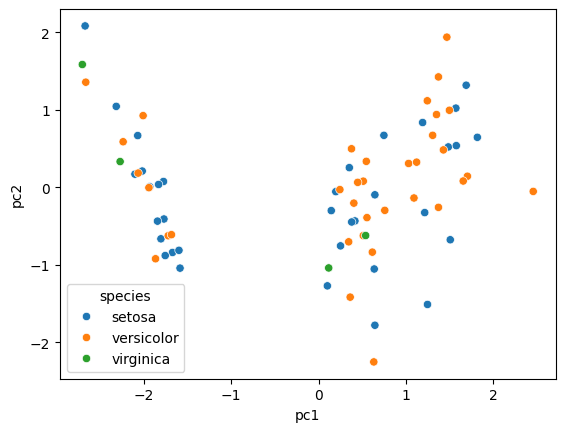

In [12]:
#format and visualise the transformed training data
df_pca_train = pd.DataFrame(data = pca_train, columns = ['pc1', 'pc2'])
df_pca_train['species']=y_train
sns.scatterplot(x='pc1', y='pc2', hue=df_pca_train['species'], data=df_pca_train);

**Transform the test data**

In [13]:
#1- First apply the scaler that has been built based on the training data to scale the test data
X_test_ss = scaler.transform(X_test)
#2- Second apply the pca transformation that has been built based on the training data to transfer the scaled test data
pca_test = pca.transform(X_test_ss)

**Classification**

In [14]:
# Performing classification based on the orignal data
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
#classifier=SVC()
classifier.fit(X_train, y_train)
score = accuracy_score(classifier.predict(X_test), y_test)
print('Accuracy before transformation  = {:.2f}'.format(score))

Accuracy before transformation  = 0.91


In [15]:
# Performing classification using the pca-based transformed data
classifier.fit(pca_train, y_train)
score = accuracy_score(classifier.predict(pca_test), y_test)
print('Accuracy after PCA transformation  = {:.2f}'.format(score))

Accuracy after PCA transformation  = 0.93


**ICA**

In [16]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
ica_train = ica.fit_transform(X_train_ss)  # nb. we already did the scaling, above

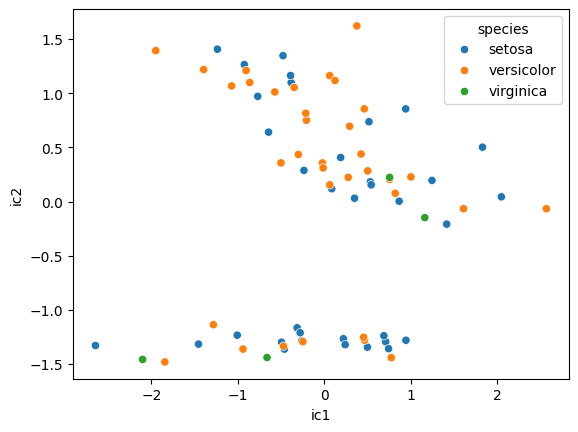

In [17]:
# Visualisation
df_ica_train = pd.DataFrame(data = ica_train, columns = ['ic1', 'ic2'])
df_ica_train['species']=y_train
sns.scatterplot(x='ic1', y='ic2', hue=df_ica_train['species'], data=df_ica_train);

In [18]:
# Performing classification using the ica-based transformed data
# Transform test data using ica
classifier.fit(ica_train, y_train)
ica_test = ica.transform(X_test_ss)
score = accuracy_score(classifier.predict(ica_test), y_test)
print('Accuracy after ICA transformation  = {:.2f}'.format(score))

Accuracy after ICA transformation  = 0.96


**GP transformers**

In [19]:
# Might need to install the package for genetic programming (gp)
!pip install gplearn

In [26]:
#Since this package does not work when the target variable is string, an encoder is used to convert it
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded = le.fit_transform(y_train)
label_encoded

array([1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0])